# Compare the facilities being offered exemptions from reporting with all USA facilities
Do these facilities really deserve to be trusted to do the right thing?

Compare violations per facility, and also look at inspections per facility to see how often the EPA has deemed it necessary to look into these facilities.

In [3]:
import pandas as pd

### Run the cell for either Violations per facility or Inspections per facility
Then execute the rest of the cells to end with the chart.

## Violations per facility - CAA

In [5]:
usa_filename = '/mnt/c/Users/steve/workspace/EDGI/ECHO-Cross-Program/CSVs/usa-violations.csv'
exemptions_filename = '/mnt/c/Users/steve/workspace/EDGI/ECHO-Cross-Program/CSVs/CAA-Violations-EDF-20250722.csv'
date_column = 'EARLIEST_FRV_DETERM_DATE'
data_column = 'Viol/fac'
graph_title = 'Violations per facility--All USA CAA facilities versus Exempted facilities'
y_axis = 'Violations/facility'

## Inspections per facility - CAA

In [32]:
usa_filename = '/mnt/c/Users/steve/workspace/EDGI/ECHO-Cross-Program/CSVs/usa-inspections.csv'
exemptions_filename = '/mnt/c/Users/steve/workspace/EDGI/ECHO-Cross-Program/CSVs/CAA-Inspections-EDF-20250722.csv'
date_column = 'ACTUAL_END_DATE'
data_column = 'Insp/fac'
graph_title = 'Inspections per facility--All USA CAA facilities versus Exempted facilities'
y_axis = 'Inspections/facility'

## Enforcements per facility - CAA

In [22]:
usa_filename = '/mnt/c/Users/steve/workspace/EDGI/ECHO-Cross-Program/CSVs/usa-enforcements.csv'
exemptions_filename = '/mnt/c/Users/steve/workspace/EDGI/ECHO-Cross-Program/CSVs/CAA-Penalties-EDF-20250722.csv'
date_column = 'SETTLEMENT_ENTERED_DATE'
data_column = 'Enf/fac'
graph_title = 'Enforcements per facility--All USA CAA facilities versus Exempted facilities'
y_axis = 'Enforcements/facility'

In [34]:
usa = pd.read_csv(usa_filename, delimiter='|')
usa.set_index('Year', inplace=True)
usa['Who'] = 'All Other'
usa.rename(columns={'All Other' : data_column}, inplace=True)
usa['Insp/fac'] = usa['Count']/196154
usa

,Count,Who,Insp/fac
Year,,,
2017,47587,All Other,0.242600
2018,47328,All Other,0.241280
2019,49103,All Other,0.250329
2020,46694,All Other,0.238048
2021,48364,All Other,0.246561
2022,47787,All Other,0.243620
2023,46619,All Other,0.237665
2024,44990,All Other,0.229361


In [35]:
num_facs = 404
exemptions = pd.read_csv(exemptions_filename)
exemptions = exemptions[['REGISTRY_ID', date_column]]
exemptions['Date'] = pd.to_datetime(exemptions[date_column])
exemptions['Year'] = pd.DatetimeIndex(exemptions['Date']).year
exemptions

,REGISTRY_ID,ACTUAL_END_DATE,Date,Year
0,110056966948,2018-03-19,2018-03-19,2018
1,110056966948,2017-08-22,2017-08-22,2017
2,110056966948,2020-05-01,2020-05-01,2020
3,110056966948,2024-08-05,2024-08-05,2024
4,110056966948,2019-10-11,2019-10-11,2019
...,...,...,...,...
6448,110071876299,2024-11-21,2024-11-21,2024
6449,110071723488,2022-05-17,2022-05-17,2022
6450,110071723488,2018-08-29,2018-08-29,2018
6451,110071723488,2017-08-22,2017-08-22,2017


In [36]:
df = exemptions.groupby(['Year', 'REGISTRY_ID']).count()
df = df.reset_index()
df1 = df.groupby(['Year']).count()
df2 = df.groupby(['Year']).sum()
df3 = df2.join(df1, lsuffix='_l', rsuffix='_r')
df3 = df3[['Date_l']]
df3[data_column] = df3['Date_l']/num_facs
df3['Who'] = 'Exempted'
df3.drop(['Date_l'], axis=1, inplace=True)
df3

,Insp/fac,Who
Year,,
2017,2.054455,Exempted
2018,2.069307,Exempted
2019,2.180693,Exempted
2020,1.967822,Exempted
2021,1.945545,Exempted
2022,1.950495,Exempted
2023,1.948020,Exempted
2024,1.856436,Exempted


In [37]:
df4 = pd.concat([usa, df3], axis=0)
df4

,Count,Who,Insp/fac
Year,,,
2017,47587.0,All Other,0.242600
2018,47328.0,All Other,0.241280
2019,49103.0,All Other,0.250329
2020,46694.0,All Other,0.238048
2021,48364.0,All Other,0.246561
2022,47787.0,All Other,0.243620
2023,46619.0,All Other,0.237665
2024,44990.0,All Other,0.229361
2017,NaN,Exempted,2.054455


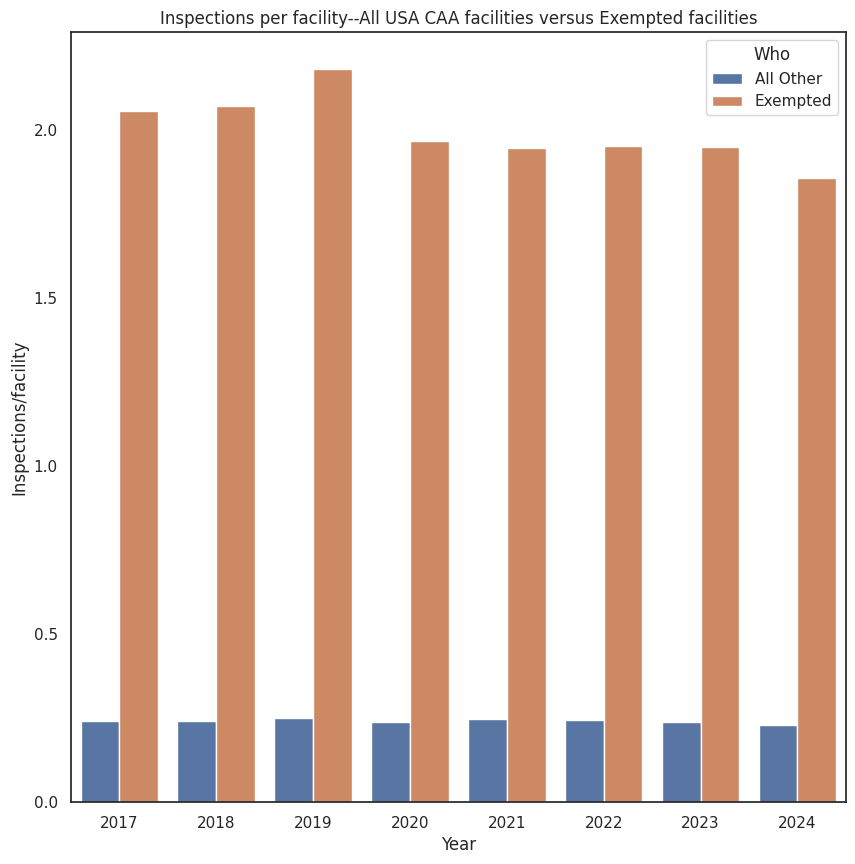

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart

fig, ax = plt.subplots(figsize=(10,10))
try:
    g = sns.barplot(x='Year', y=data_column, hue='Who', data=df4)
    g.set_title(graph_title)
    ax.set_ylabel(y_axis)
except TypeError as te:
    print("TypeError: {}".format(str(te)))
